c:\Users\zhang\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\zhang\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


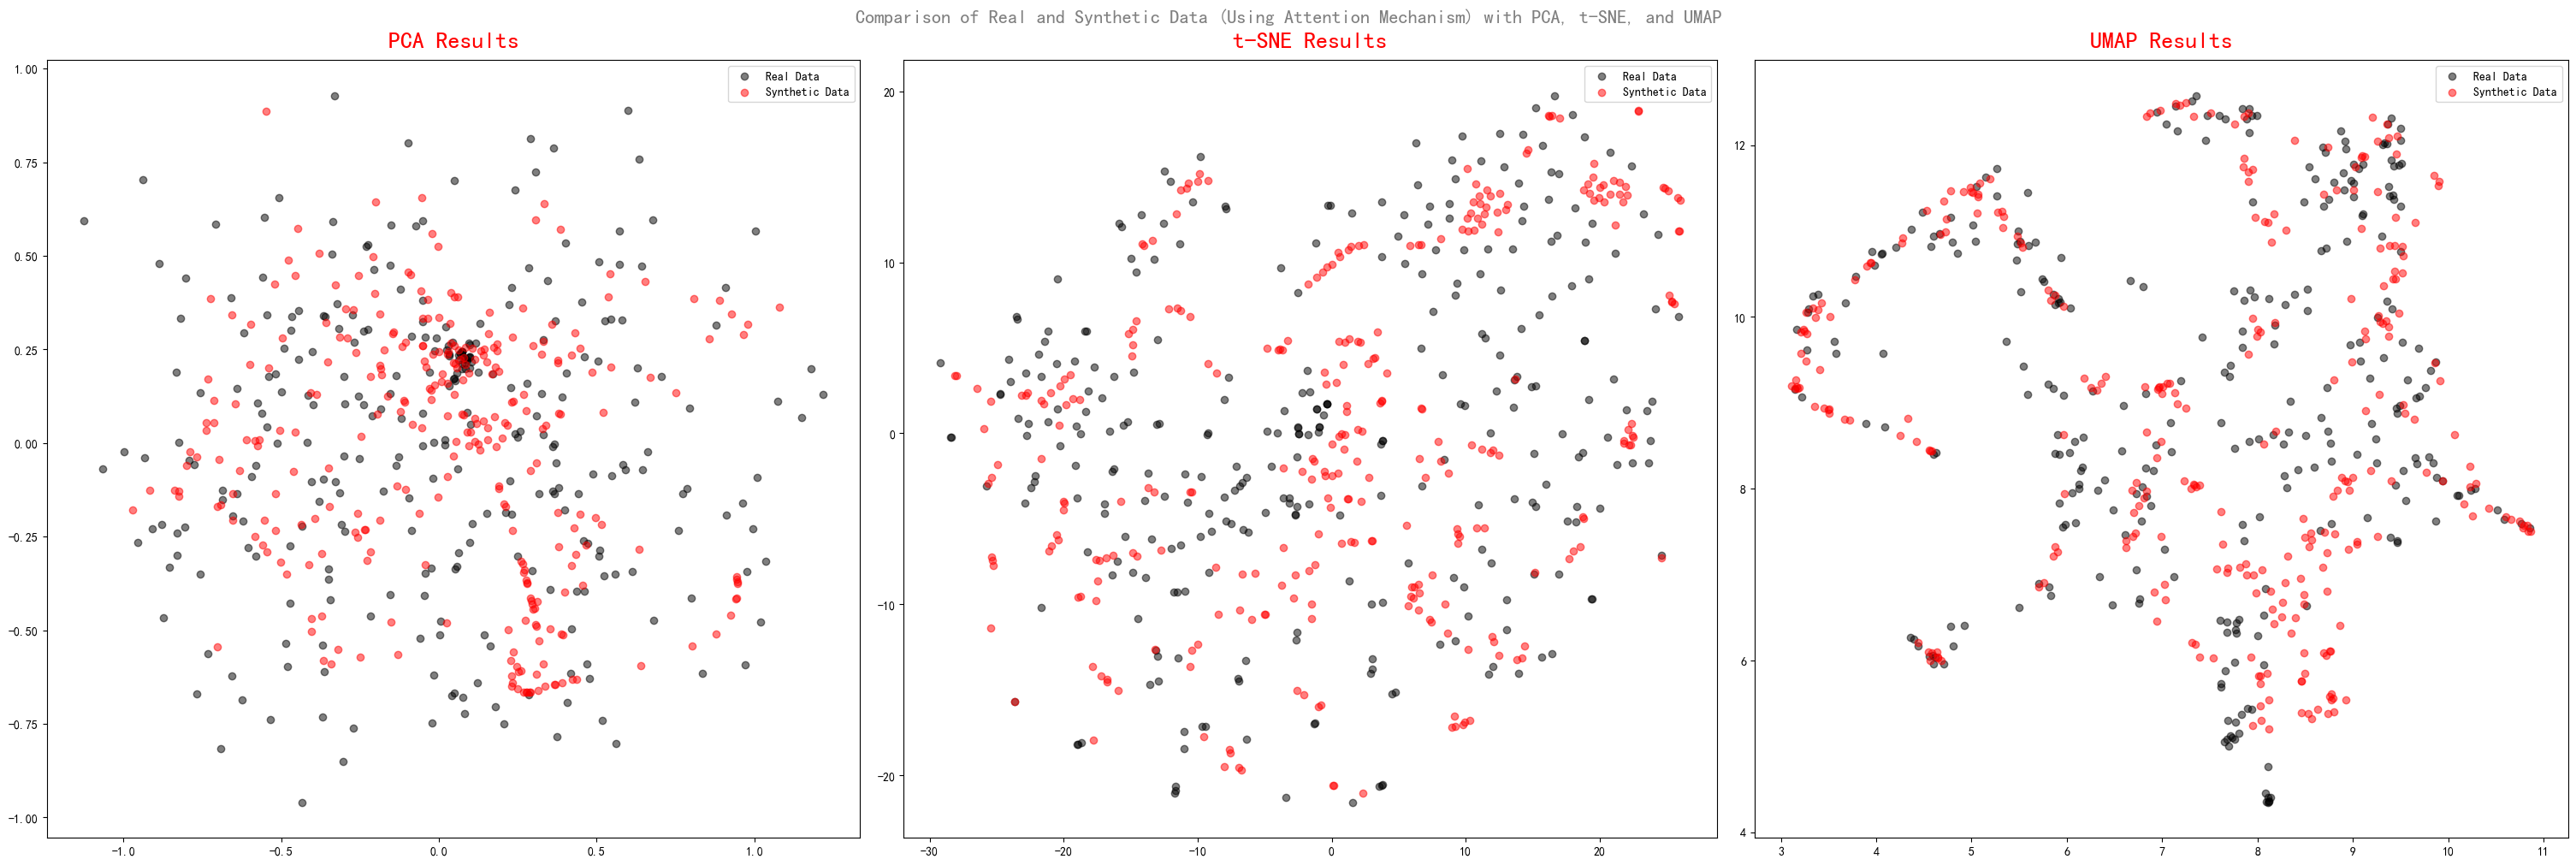

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.gridspec as gridspec

# 检查UMAP模块是否可用
try:
    import umap.umap_ as umap
except ModuleNotFoundError:
    print("UMAP模块未找到。请运行: pip install umap-learn")
    raise

# 数据路径
real_data_path = r'D:\微量元素与图神经网络\微量元素与图神经网络\data_GAN_log_transformed.csv'
synthetic_data_path = r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_data_with_attention.npy'

# 加载真实和合成数据
real_data = pd.read_csv(real_data_path)
synthetic_data = np.load(synthetic_data_path)

# 数据预处理：排除非特征列
exclude_cols = ['唯一编号', '日期', '住院日序号', '性别', '年龄']
feature_cols = [c for c in real_data.columns if c not in exclude_cols]
real_data_processed = real_data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
real_data_reshaped = real_data_processed.values

# 确定样本大小，使用整个数据集
actual_sample_size = real_data_reshaped.shape[0]
synthetic_sample = synthetic_data.reshape(-1, len(feature_cols))[:actual_sample_size]

# 执行 PCA 降维
pca = PCA(n_components=2)
real_pca = pca.fit_transform(real_data_reshaped)
synthetic_pca = pca.transform(synthetic_sample)

# 执行 t-SNE 降维
tsne = TSNE(n_components=2, n_iter=500, random_state=42)
tsne_combined = tsne.fit_transform(np.vstack((real_data_reshaped, synthetic_sample)))
real_tsne = tsne_combined[:actual_sample_size]
synthetic_tsne = tsne_combined[actual_sample_size:]

# 执行 UMAP 降维
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_combined = umap_reducer.fit_transform(np.vstack((real_data_reshaped, synthetic_sample)))
real_umap = umap_combined[:actual_sample_size]
synthetic_umap = umap_combined[actual_sample_size:]

# 可视化 PCA、t-SNE 和 UMAP 结果
fig = plt.figure(constrained_layout=True, figsize=(30, 10))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# PCA散点图
ax1 = fig.add_subplot(spec[0, 0])
ax1.set_title('PCA Results', fontsize=20, color='red', pad=10)
ax1.scatter(real_pca[:, 0], real_pca[:, 1], c='black', alpha=0.5, label='Real Data')
ax1.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], c='red', alpha=0.5, label='Synthetic Data')
ax1.legend()

# t-SNE散点图
ax2 = fig.add_subplot(spec[0, 1])
ax2.set_title('t-SNE Results', fontsize=20, color='red', pad=10)
ax2.scatter(real_tsne[:, 0], real_tsne[:, 1], c='black', alpha=0.5, label='Real Data')
ax2.scatter(synthetic_tsne[:, 0], synthetic_tsne[:, 1], c='red', alpha=0.5, label='Synthetic Data')
ax2.legend()

# UMAP散点图
ax3 = fig.add_subplot(spec[0, 2])
ax3.set_title('UMAP Results', fontsize=20, color='red', pad=10)
ax3.scatter(real_umap[:, 0], real_umap[:, 1], c='black', alpha=0.5, label='Real Data')
ax3.scatter(synthetic_umap[:, 0], synthetic_umap[:, 1], c='red', alpha=0.5, label='Synthetic Data')
ax3.legend()

fig.suptitle('Comparison of Real and Synthetic Data (Using Attention Mechanism) with PCA, t-SNE, and UMAP', fontsize=16, color='grey')
plt.show()


C:\Users\zhang\AppData\Local\Temp\ipykernel_23368\80224141.py:41: UserWarning: Glyph 21453 (\N{CJK UNIFIED IDEOGRAPH-53CD}) missing from current font.
  fig.tight_layout()
C:\Users\zhang\AppData\Local\Temp\ipykernel_23368\80224141.py:41: UserWarning: Glyph 24212 (\N{CJK UNIFIED IDEOGRAPH-5E94}) missing from current font.
  fig.tight_layout()
C:\Users\zhang\AppData\Local\Temp\ipykernel_23368\80224141.py:41: UserWarning: Glyph 34507 (\N{CJK UNIFIED IDEOGRAPH-86CB}) missing from current font.
  fig.tight_layout()
C:\Users\zhang\AppData\Local\Temp\ipykernel_23368\80224141.py:41: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from current font.
  fig.tight_layout()
C:\Users\zhang\AppData\Local\Temp\ipykernel_23368\80224141.py:41: UserWarning: Glyph 26411 (\N{CJK UNIFIED IDEOGRAPH-672B}) missing from current font.
  fig.tight_layout()
C:\Users\zhang\AppData\Local\Temp\ipykernel_23368\80224141.py:41: UserWarning: Glyph 31471 (\N{CJK UNIFIED IDEOGRAPH-7AEF}) missing from cur

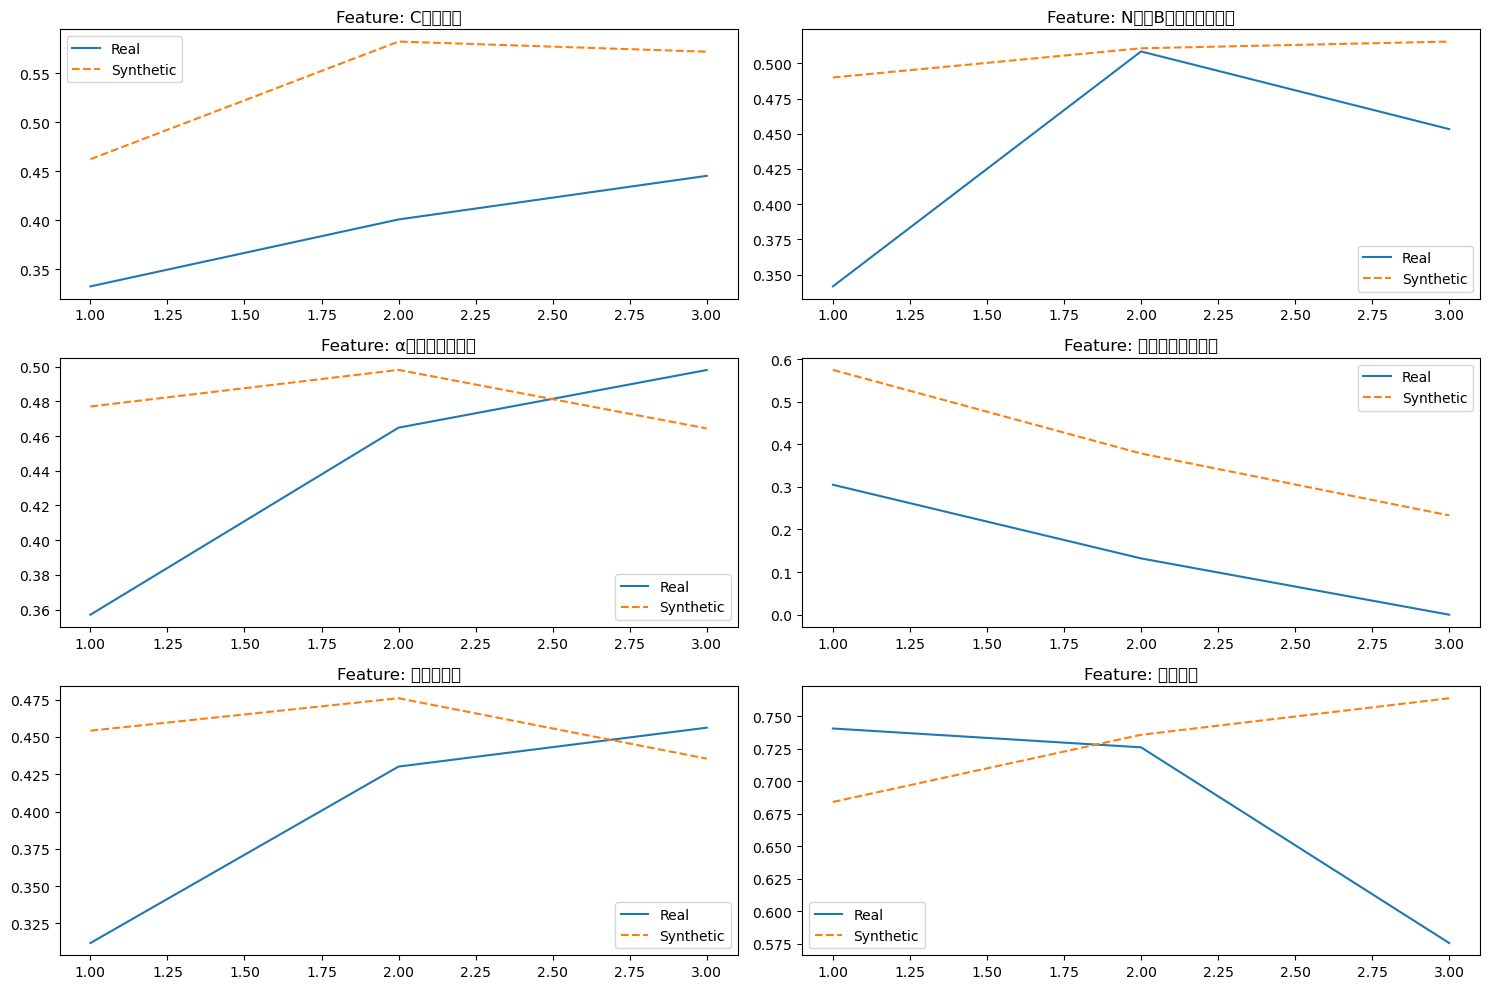

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 数据路径
real_data_path = r'D:\微量元素与图神经网络\微量元素与图神经网络\data_GAN_log_transformed.csv'
synthetic_data_path = r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_data_with_attention.npy'

# 加载真实和合成数据
real_data = pd.read_csv(real_data_path)
synthetic_data = np.load(synthetic_data_path)

# 数据预处理：排除非特征列
exclude_cols = ['唯一编号', '日期', '住院日序号', '性别', '年龄']
feature_cols = [c for c in real_data.columns if c not in exclude_cols]
real_data_processed = real_data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# 确保输入数据的形状正确 (99, 3, 57)
assert synthetic_data.shape == (99, 3, len(feature_cols)), "合成数据形状不匹配！"
real_data_reshaped = real_data_processed.values.reshape(99, 3, len(feature_cols))

# 绘制某个随机样本的多特征时序数据
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# 随机选取一个样本
obs = np.random.randint(low=0, high=real_data_reshaped.shape[0])  # 样本数是第一维
time = list(range(1, real_data_reshaped.shape[1] + 1))  # 时间步，第二维

# 绘制每个特征的真实与合成数据对比
for j, col in enumerate(feature_cols[:len(axes)]):  # 避免超出子图范围
    df = pd.DataFrame({
        'Real': real_data_reshaped[obs, :, j],
        'Synthetic': synthetic_data[obs, :, j]
    }, index=time)

    df.plot(ax=axes[j],
            title=f'Feature: {col}',
            style=['-', '--'])

fig.tight_layout()
plt.show()


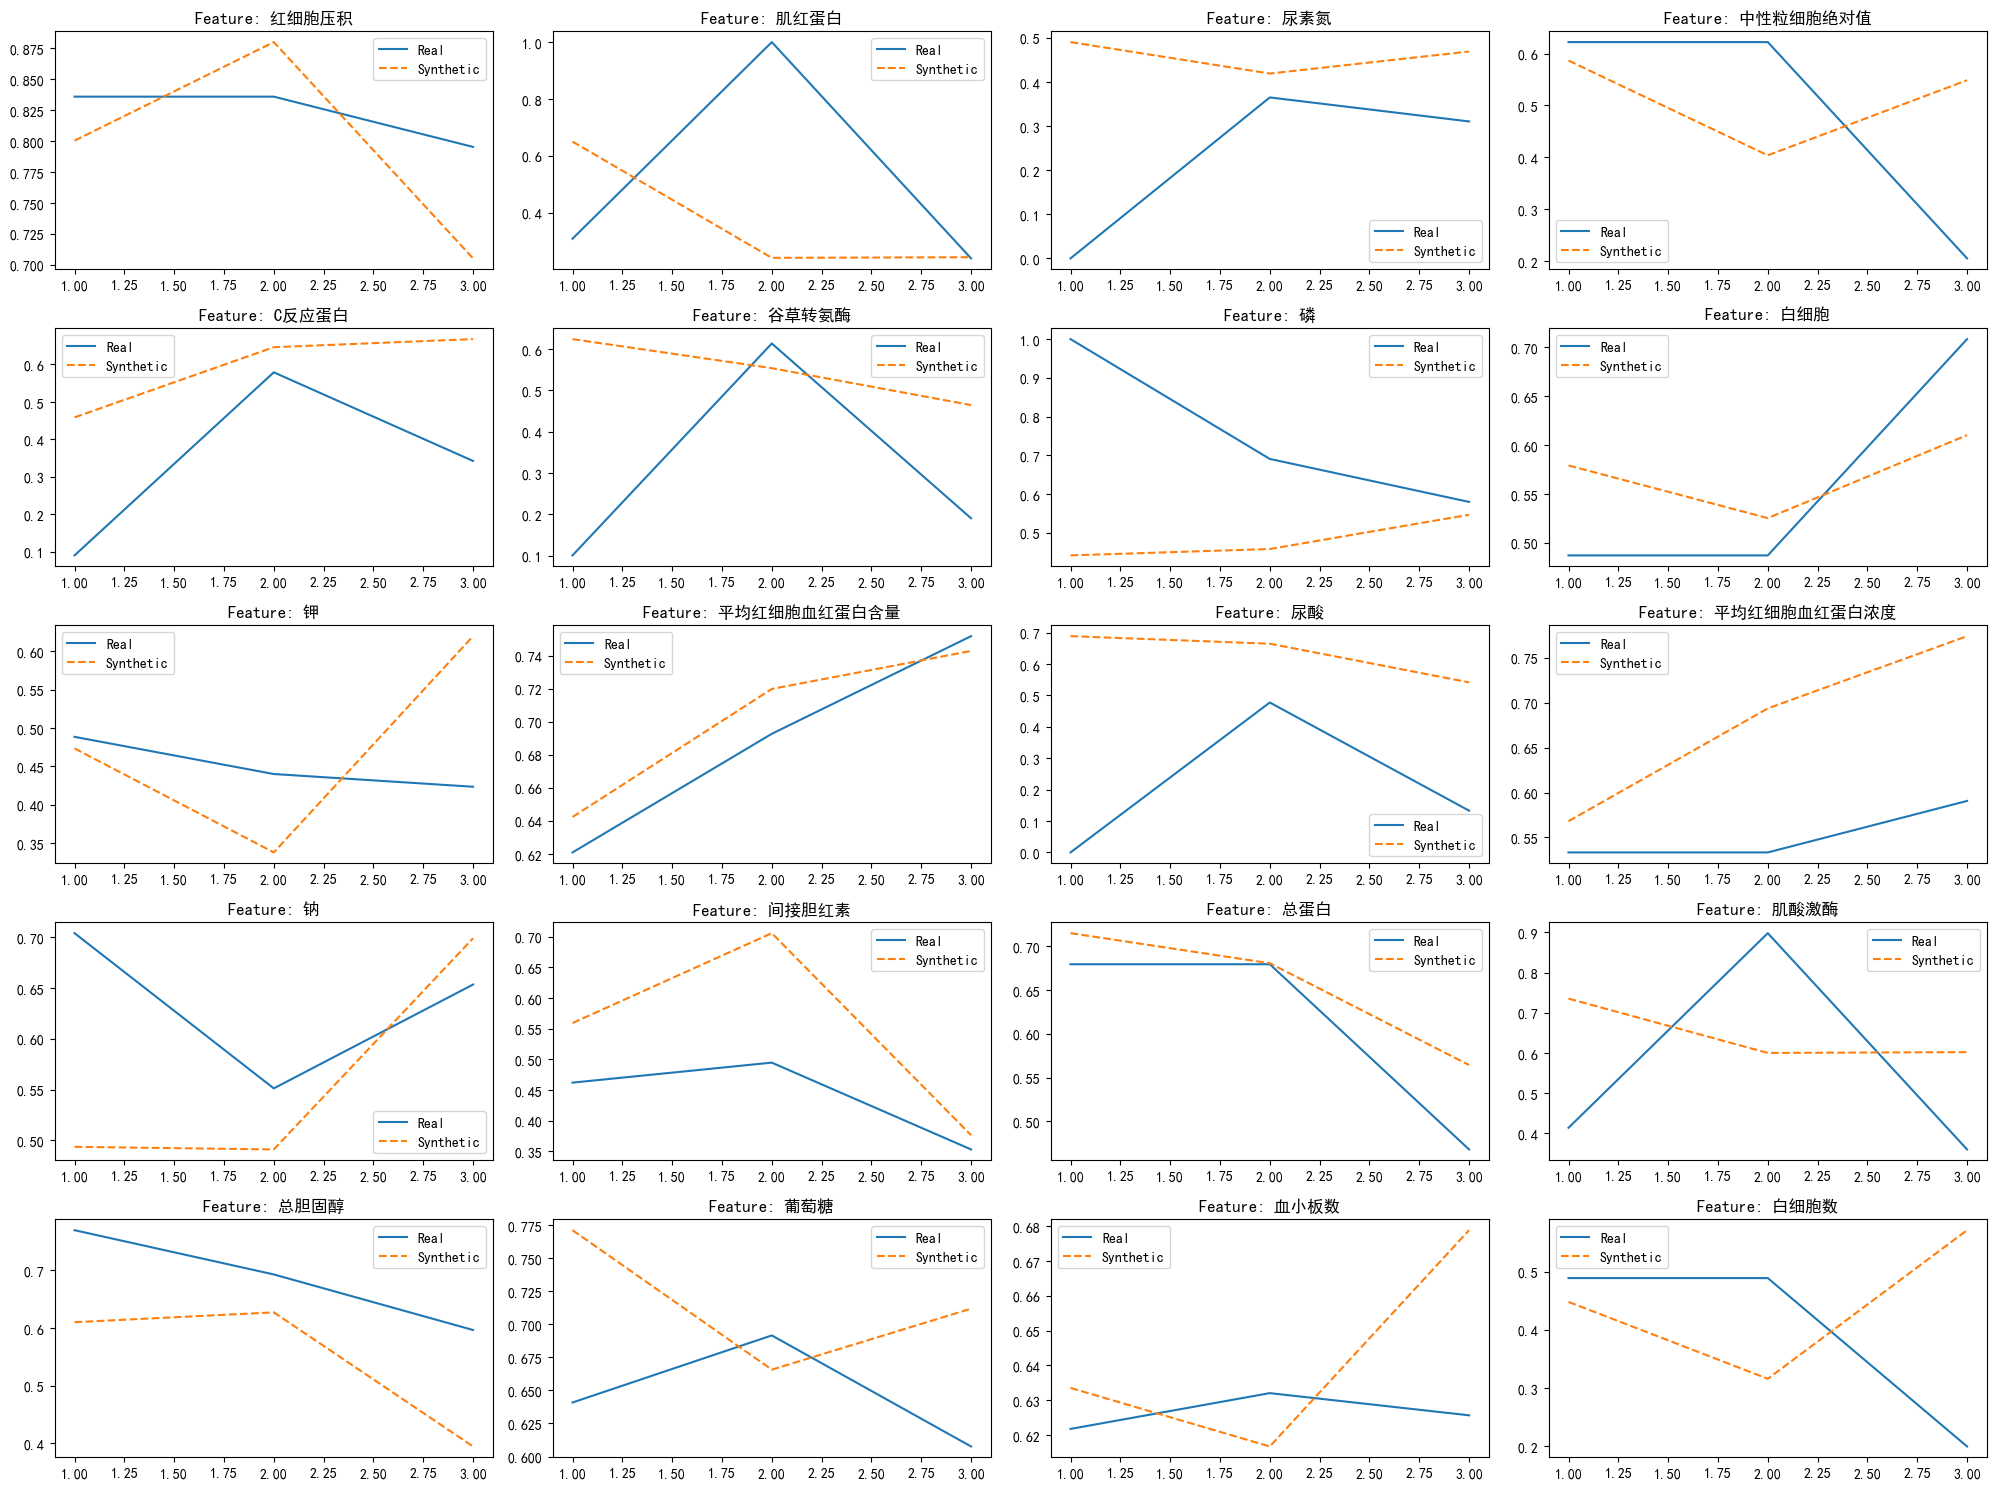

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体为黑体，避免中文乱码问题
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 数据路径
real_data_path = r'D:\微量元素与图神经网络\微量元素与图神经网络\data_GAN_log_transformed.csv'
synthetic_data_path = r'D:\微量元素与图神经网络\微量元素与图神经网络\synthetic_data_with_attention.npy'

# 加载真实和合成数据
real_data = pd.read_csv(real_data_path)
synthetic_data = np.load(synthetic_data_path)

# 数据预处理：排除非特征列
exclude_cols = ['唯一编号', '日期', '住院日序号', '性别', '年龄']
feature_cols = [c for c in real_data.columns if c not in exclude_cols]
real_data_processed = real_data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# 确保输入数据的形状正确 (99, 3, 57)
assert synthetic_data.shape == (99, 3, len(feature_cols)), "合成数据形状不匹配！"
real_data_reshaped = real_data_processed.values.reshape(99, 3, len(feature_cols))

# 随机抽取 20 个特征进行可视化
random_features = np.random.choice(feature_cols, size=20, replace=False)

# 确定子图布局
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))
axes = axes.flatten()

# 随机选取一个样本
obs = np.random.randint(low=0, high=real_data_reshaped.shape[0])  # 样本数是第一维
time = list(range(1, real_data_reshaped.shape[1] + 1))  # 时间步，第二维

# 绘制每个特征的真实与合成数据对比
for i, col in enumerate(random_features):
    j = feature_cols.index(col)  # 获取特征的索引
    df = pd.DataFrame({
        'Real': real_data_reshaped[obs, :, j],
        'Synthetic': synthetic_data[obs, :, j]
    }, index=time)

    df.plot(ax=axes[i],
            title=f'Feature: {col}',
            style=['-', '--'])

# 调整布局
fig.tight_layout()
plt.show()
